# SpaceX  Falcon 9 first stage landing prediction with machine learning and data sciences

# Outline
- [1 Introduction ](#1)
- [2 Get the data](#2)
    - [2.1 Select relevant data](#2.1)
    - [2.2 Decode the information](#2.2)
        - [2.2.1 Clean Features](#2.2.1)
        - [2.2.2 Get booster information](#2.2.2)
        - [2.2.3 Get payload information](#2.2.3)
        - [2.2.4 Get launchpad information](#2.2.4)
        - [2.2.5 Get core information](#2.2.4)
        - [2.2.6 Get  landig pad names](#2.2.6)
    - [2.3 Build a new dataset with requested data](#2.3)
    - [2.4 Clean the data](#2.4)
    - [2.4.1 Fill PayloadMass with the mean](#2.4.1)
    - [2.4.2 Change target variable to binary](#2.4.2)
- [3 Analize the data](#3)
    - [3.1- Analysis summary](#3.1)
    - [3.2 - Analysis detail](#3.2)
        - [3.2.1 Orbits](#3.2.1)
        - [3.2.2 Launchsite locations](#3.2.2)
        - [3.2.3 Launchsite sucess ratio on map](#3.2.3)
        - [3.2.4 Success through the years](#3.2.4)
        - [3.2.5 Payload Mass](#3.2.5)
        - [3.2.6 Orbits sucess](#3.2.6)
        - [3.2.7 Launch sites sucess](#3.2.7)
        - [3.2.8 Number of flights (reused)](#3.2.8)
        - [3.2.9 Added parts](#3.2.9)



<a name="1"></a>
# 1- Introduction

SpaceX (Space Exploration Technologies Corp) is an American company founded in 2002 that designs, manufactures and launches advanced rockets, spacecraft and satellite communications. It was founded by Elon Musk with the stated goal of reducing space transportation costs to enable the colonization of Mars. SpaceX's premise for cost reduction is based primarily on the reuse of components that are traditionally discarded at each launch.

One of the company's most iconic projects is the partially reusable heavy-lift launch vehicle Falcon 9 whose development began in October 2005. spaceX announced plans to launch Falcon 9 in the first half of 2007 but the initial launch would not occur until 2010. The orbital capabilities of the falcon 9 vehicle were never in question due to the previous success of its predecessor, the falcon 1. Not so its reuse due to the high landing failure rate during its first flights.

This work makes use of data analysis and machine learning techniques in order to better understand the development of the Falcon 9, its missions, improvements over the years and parameters that impacted mission performance. Likewise, it proposes a model to predict the success or failure of each launch.

<a name="2"></a>
# 2- Get the data

To obtain the information, the unofficial API published on GitHub by jakewmeyer in its latest version (V4 is the completed latest version, V5 is not complete) is used. 

*Additional information and documentation*: [GitHub Page](https://github.com/r-spacex/SpaceX-API/tree/master/docs).

In [1]:
# import necessary libraries to get and manipulate the data
import requests
import numpy as np
import pandas as pd
import datetime

In [2]:
# Endpoint for the V5 version
ENDPOINT = 'https://api.spacexdata.com/v4'

# Request the data
response = requests.get(url=ENDPOINT+'/launches/past')
print("HTML Code: ",response)

# Convert the raw data (JSON Anidade) into pandas dataframe
data = pd.json_normalize(response.json())
print('Data shape:', data.shape)
data.head()

HTML Code:  <Response [200]>
Data shape: (187, 43)


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


<a name="2.1"></a>
## 2.1- Select relevant data
There are irrelevant features for analysis and training. We proceed to select only those that are useful.

In [3]:
# Take a relevant subset of the original data 
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc
0,5e9d0d95eda69955f709d1eb,[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",1,2006-03-24T22:30:00.000Z
1,5e9d0d95eda69955f709d1eb,[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",2,2007-03-21T01:10:00.000Z
2,5e9d0d95eda69955f709d1eb,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...",5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591814873b2625', 'flight'...",3,2008-08-03T03:34:00.000Z
3,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",4,2008-09-28T23:15:00.000Z
4,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",5,2009-07-13T03:35:00.000Z


<a name="2.2"></a>
## 2.2 Decode the information
The information contained in most features (such as rocket, payloads, launchpad etc) only has an identification value. It is required to request the detail of each of these codes through the API. The procedure is shown below.

<a name="2.2.1"></a>
### 2.2.1 Clean features
Launches with two or more rockets and two or more payloads are eliminated. Likewise, the value of each cell is transformed for the correct use of the API.

In [4]:
# Select only launches with 1 payload and 1 core (1 rocket)
data = data[data['payloads'].str.len() == 1]
data = data[data['cores'].str.len() == 1]

# Check the result
print(data['payloads'].str.len().value_counts())
print('-'*30)
print(data['cores'].str.len().value_counts())

# transform the list type object of payloads and cores into single string
data['payloads'] = data['payloads'].str[0]
data['cores'] = data['cores'].str[0]

# Format the date (short format)
data['date'] = pd.to_datetime(data['date_utc']).dt.date

1    172
Name: payloads, dtype: int64
------------------------------
1    172
Name: cores, dtype: int64


Due to the high success rate of spaceX as of 2021 this analysis focuses only on previous dates.

In [5]:
# Using the date we will restrict the dates of the launches (the rate of success after 2020 is very high)
data = data[data['date'] <= datetime.date(2020, 11, 13)]
print('Data shape:', data.shape)
data.head()

Data shape: (94, 7)


,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight':...",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight':...",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight':...",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight':...",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight':...",6,2010-06-04T18:45:00.000Z,2010-06-04


<a name="2.2.2"></a>
### 2.2.2 Get booster information

In [6]:
# Declare list for the rocket relevant parameters
boosterName = []

# Declare a fucntion to get all rocket relevant parameters
def getBoosterInfo(id):
    response = requests.get(url=ENDPOINT+'/rockets/'+str(id))
    json = response.json()
    boosterName.append(json['name'])

# Execute the function for every element
for rocket in data['rocket']:
    getBoosterInfo(rocket)
    
# Print unique values of the boosters (This work focus on Falcon 9 only)
print('Booster in the data: ',set(boosterName))

Booster in the data:  {'Falcon 1', 'Falcon 9'}


<a name="2.2.3"></a>
### 2.2.3 Get payload information
The information provided by the API includes irrelevant data for training such as 'capsule name', 'typo', 'nationality' etc. For this analysis it will be considered: 'mass', 'orbit' and 'reused'. The information 'periapsis_km', 'apoapsis_km' and 'inclination_deg', which is also relevant is already included in the orbit.

In [7]:
# Declare lists for the payloads relevant parameters
payloadMass = []
payloadOrbit = []
payloadReused = []

# Declare function to get all relevant payload parameters
def getPayloadInfo(id):
    response = requests.get(url=ENDPOINT+'/payloads/'+str(id))
    json = response.json()
    payloadMass.append(json['mass_kg'])
    payloadOrbit.append(json['orbit'])
    payloadReused.append(json['reused'])
    
# Execute the function for every element
for payload in data['payloads']:
    getPayloadInfo(payload)
    
print('Orbits in the data: ',set(payloadOrbit))

Orbits in the data:  {'GEO', 'LEO', 'GTO', 'VLEO', 'SSO', 'HEO', 'ISS', 'PO', 'ES-L1', 'MEO', 'SO'}


<a name="2.2.4"></a>
### 2.2.4 Get launchpad information
The information regarding the name of the platform, its geographical location and its success rate is extracted.

In [8]:
# Declare lists for the launchpad relevant parameters
launchName = []
launchLat = []
launchLon = []
launSuccRatio = []

# Declare function to get all launchpad relevant parameters
def getLaunchInfo(id):
    response = requests.get(url=ENDPOINT+'/launchpads/'+str(id))
    json = response.json()
    launchName.append(json['name'])  
    launchLat.append(json['latitude'])
    launchLon.append(json['longitude'])
    launSuccRatio.append(np.round(json['launch_successes']/json['launch_attempts'],4))
    
# Execute the function for every element
for launch in data['launchpad']:
    getLaunchInfo(launch)
    
print('Launchpads in the data: ',set(launchName))
print('Launchpads Success ratio: ',set(launSuccRatio))

Launchpads in the data:  {'KSC LC 39A', 'CCSFS SLC 40', 'Kwajalein Atoll', 'VAFB SLC 4E'}
Launchpads Success ratio:  {0.4, 0.9798, 0.9643, 1.0}


<a name="2.2.5"></a>
### 2.2.5 Get core information
The information regarding the core stage of the falcon 9.

In [9]:
# Composition of the core dictionary
data['cores'][0]

{'core': '5e9e289df35918033d3b2623',
 'flight': 1,
 'gridfins': False,
 'legs': False,
 'reused': False,
 'landing_attempt': False,
 'landing_success': None,
 'landing_type': None,
 'landpad': None}

In [10]:
# Information already in the dataset (previous cell)
flights = []
legs = []
reused = []
landingPad = []
gridFins = []
Outcome = []
# Information to request to the API (only if core exist)
coreReuseCount = []
coreSerial = []
coreBlock = []

# Declare function to get all Core relevant parameters
def getCoreInfo(coredict):
    # Append data only if core exist in the launch mission
    if coredict['core'] != None:
        response = requests.get(url=ENDPOINT+'/cores/'+str(coredict['core']))
        json = response.json()
        coreReuseCount.append(json['reuse_count'])
        coreSerial.append(json['serial'])
        coreBlock.append(json['block'])
    # None if there is no core
    else:
        coreReuseCount.append(None)
        coreSerial.append(None)
        coreBlock.append(None)
    # Append data that is already in the data set (no request is necessary)
    flights.append(coredict['flight'])
    legs.append(coredict['legs'])
    reused.append(coredict['reused'])
    landingPad.append(coredict['landpad'])
    gridFins.append(coredict['gridfins'])
    Outcome.append(str(coredict['landing_success'])+' '+str(coredict['landing_type']))

# Execute the function for every element        
for core in data['cores']:
    getCoreInfo(core)
    
# The landing pads are encrypted
print('Landingpads in the data: ',set(landingPad))
print('Outcomes in the data: ',set(Outcome)) 

Landingpads in the data:  {'5e9e3032383ecb6bb234e7ca', '5e9e3032383ecb554034e7c9', '5e9e3032383ecb267a34e7c7', None, '5e9e3032383ecb761634e7cb', '5e9e3033383ecbb9e534e7cc'}
Outcomes in the data:  {'None ASDS', 'None None', 'False Ocean', 'True ASDS', 'False RTLS', 'False ASDS', 'True Ocean', 'True RTLS'}


<a name="2.2.6"></a>
### 2.2.6 Get  landig pad names

In [11]:
# Declare function to get the mane of the landigpad based on the code
def getLandigPadInfo(id):
    # Request only if there is a code
    if id != None:
        response = requests.get(url=ENDPOINT+'/landpads/'+str(id))
        json = response.json()
        return json['name']
    else:
        return np.nan

# Replace the landigpad code with their redable name
for index in range(0,len(landingPad)):
    landingPad[index] = getLandigPadInfo(landingPad[index])
    
# NOTE: This procedure is extremely inefficient because 94 requests are made 
# when there are only 4 different codes. 
# ALTERNATIVE: formulate a dictionary and replace the codes (only 4 requests are required)

<a name="2.3"></a>
## 2.3 Build a new dataset with requested data
A new dataset is created with pandas with the relevant information.

In [12]:
# Create a diccionarie for the Dataframe with all the previusly opbtained data
spacex_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':boosterName,
'PayloadMass':payloadMass,
'Orbit':payloadOrbit,
'PayloadReused':payloadReused,
'LaunchSite':launchName,
'Latitude': launchLat,
'Longitude': launchLon,
'PlatformSuccessRatio':launSuccRatio,
'Flights':flights,
'Legs':legs,
'Reused':reused,
'LandingPad':landingPad,
'GridFins':gridFins,
'CoreReusedCount':coreReuseCount,
'Serial':coreSerial,
'Block':coreBlock,
'Outcome':Outcome}

# Create the new Dataframe
falcon9_data = pd.DataFrame(spacex_dict)

# Select only falcon 9 rockets
falcon9_data = falcon9_data[falcon9_data['BoosterVersion'] == 'Falcon 9']

# Reset the index and update the flight number from 1 to len(feature)+1
falcon9_data.reset_index(inplace=True,drop=True)
falcon9_data['FlightNumber'] = list(range(1,len(falcon9_data['FlightNumber']) + 1))
falcon9_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,PayloadReused,LaunchSite,Latitude,Longitude,PlatformSuccessRatio,Flights,Legs,Reused,LandingPad,GridFins,CoreReusedCount,Serial,Block,Outcome
0,1,2010-06-04,Falcon 9,NaN,LEO,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,1,False,False,NaN,False,0,B0003,1.0,None None
1,2,2012-05-22,Falcon 9,525.0,LEO,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,1,False,False,NaN,False,0,B0005,1.0,None None
2,3,2013-03-01,Falcon 9,677.0,ISS,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,1,False,False,NaN,False,0,B0007,1.0,None None
3,4,2013-09-29,Falcon 9,500.0,PO,False,VAFB SLC 4E,34.632093,-120.610829,0.9643,1,False,False,NaN,False,0,B1003,1.0,False Ocean
4,5,2013-12-03,Falcon 9,3170.0,GTO,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,1,False,False,NaN,False,0,B1004,1.0,None None


<a name="2.4"></a>
## 2.4 Clean the data
Some of the data obtained are missing. For analysis and modeling it is necessary to replace or remove them as appropriate

In [13]:
# Print the number of missing values
print('Number of missing values')
print('-'*30)
print(falcon9_data.isna().sum())

Number of missing values
------------------------------
FlightNumber             0
Date                     0
BoosterVersion           0
PayloadMass              5
Orbit                    0
PayloadReused            0
LaunchSite               0
Latitude                 0
Longitude                0
PlatformSuccessRatio     0
Flights                  0
Legs                     0
Reused                   0
LandingPad              26
GridFins                 0
CoreReusedCount          0
Serial                   0
Block                    0
Outcome                  0
dtype: int64


<a name="2.4.1"></a>
### 2.4.1 Fill PayloadMass with the mean
Due to the small amount of missing information from PayloadMass (only 5 flights), the average of all available data is used. Estimating the weight of the payload through other features may not have a significant impact.

In [14]:
# Fill empty payload with the mean of the entire dataset
falcon9_data['PayloadMass'].fillna(falcon9_data['PayloadMass'].mean(),inplace=True)

In [15]:
falcon9_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,PayloadReused,LaunchSite,Latitude,Longitude,PlatformSuccessRatio,Flights,Legs,Reused,LandingPad,GridFins,CoreReusedCount,Serial,Block,Outcome
0,1,2010-06-04,Falcon 9,6123.547647,LEO,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,1,False,False,NaN,False,0,B0003,1.0,None None
1,2,2012-05-22,Falcon 9,525.000000,LEO,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,1,False,False,NaN,False,0,B0005,1.0,None None
2,3,2013-03-01,Falcon 9,677.000000,ISS,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,1,False,False,NaN,False,0,B0007,1.0,None None
3,4,2013-09-29,Falcon 9,500.000000,PO,False,VAFB SLC 4E,34.632093,-120.610829,0.9643,1,False,False,NaN,False,0,B1003,1.0,False Ocean
4,5,2013-12-03,Falcon 9,3170.000000,GTO,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,1,False,False,NaN,False,0,B1004,1.0,None None


<a name="2.4.2"></a>
### 2.4.2 Change target variable to binary

There are 7 tags made up of two words to define the outcome of the mission, the first word refers to the status:
- **None**: unattempted landing (failed)
- **True**: successful landing
- **False**: failed landing

The second word referst to a location or procedure:
- **Ocean**: water
- **ASDS**: autonomous spaceport drone ship
- **RTLS** : return To Launch/Landing Site

The information is simplified to have a tarjet dependent variable to train the machine learning algorithm.

In [16]:
# Get All different values in "outcome" and save them
outcome_values = falcon9_data['Outcome'].unique()

# Print those values with their index
print("All values in Outcome variable (target)")
print("-"*40)
for index in range(0,len(outcome_values)):
    print(index," ",outcome_values[index])

All values in Outcome variable (target)
----------------------------------------
0   None None
1   False Ocean
2   True Ocean
3   False ASDS
4   None ASDS
5   True RTLS
6   True ASDS
7   False RTLS


In [17]:
# List comprehension to save the faliures
failure = list(outcome_values[i] for i in [0, 1, 3, 4, 7])

# Apply function to binary result (0: failure, 1: success)
falcon9_data['Success'] = falcon9_data['Outcome'].apply(lambda x: 0 if x in failure else 1)

In [18]:
falcon9_data.sample(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,PayloadReused,LaunchSite,Latitude,Longitude,PlatformSuccessRatio,Flights,Legs,Reused,LandingPad,GridFins,CoreReusedCount,Serial,Block,Outcome,Success
58,59,2018-12-03,Falcon 9,4000.0,SSO,False,VAFB SLC 4E,34.632093,-120.610829,0.9643,3,True,True,JRTI,True,3,B1046,5.0,True ASDS,1
36,37,2017-08-24,Falcon 9,475.0,SSO,False,VAFB SLC 4E,34.632093,-120.610829,0.9643,1,True,False,JRTI,True,1,B1038,3.0,True ASDS,1
5,6,2014-01-06,Falcon 9,3325.0,GTO,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,1,False,False,NaN,False,0,B1005,1.0,None None,0
67,68,2019-08-06,Falcon 9,6500.0,GTO,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,3,False,True,NaN,False,2,B1047,5.0,None None,0
71,72,2020-01-07,Falcon 9,15600.0,VLEO,False,CCSFS SLC 40,28.561857,-80.577366,0.9798,4,True,True,OCISLY,True,9,B1049,5.0,True ASDS,1


In [21]:
# Save all the data into a CVS file. Please uncomment if you corrected or added some data
falcon9_data.to_csv('../database/falcon9_launches.csv', index=False)

<a name="3"></a>
# 3- Analize the data

The information is analyzed graphically and statistically in order to understand the development of the Falcon 9 and find trends or patterns related to the success of the mission. The matplotlib and seaborn libraries are used to generate statistical graphs and folium for geographic maps.

<a name="3.1"></a>
## 3.1- Analysis summary

<a name="3.2"></a>
## 3.2 - Analysis detail

In [5]:
#-----------------------------------------------------
# Run from here to avoid the request time of the API
#-----------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

falcon9_data = pd.read_csv('../database/falcon9_launches.csv')
falcon9_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FlightNumber          90 non-null     int64  
 1   Date                  90 non-null     object 
 2   BoosterVersion        90 non-null     object 
 3   PayloadMass           90 non-null     float64
 4   Orbit                 90 non-null     object 
 5   PayloadReused         90 non-null     bool   
 6   LaunchSite            90 non-null     object 
 7   Latitude              90 non-null     float64
 8   Longitude             90 non-null     float64
 9   PlatformSuccessRatio  90 non-null     float64
 10  Flights               90 non-null     int64  
 11  Legs                  90 non-null     bool   
 12  Reused                90 non-null     bool   
 13  LandingPad            64 non-null     object 
 14  GridFins              90 non-null     bool   
 15  CoreReusedCount       90 

<a name="3.2.1"></a>
### 3.2.1 Orbits

In [6]:
falcon9_data['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

Include SO orbit in SSO (they are the same)

In [7]:
falcon9_data.loc[falcon9_data[falcon9_data['Orbit'] == 'SO'].index,'Orbit'] = 'SSO'

# Save all the data into a CVS file. Please uncomment if you corrected or added some data
# falcon9_data.to_csv('../database/falcon9_launches.csv', index=False)

Number of launches per orbit
------------------------------
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       6
MEO       3
ES-L1     1
HEO       1
GEO       1
Name: Orbit, dtype: int64


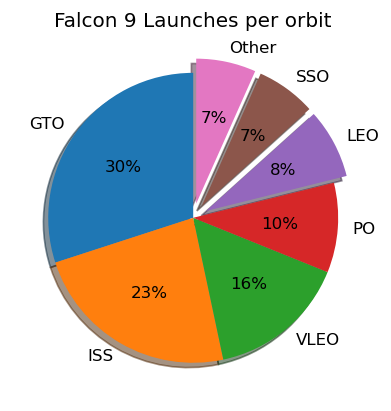

In [4]:
# Print the count of launches per launchsite
print("Number of launches per orbit")
print("-"*30)
print(falcon9_data['Orbit'].value_counts())

# Groups all orbits with less than 5 launches in the category "other"
group_orbit = {}
grouped = 0
# loop through the counts of unique values in the 'Orbit' column of the falcon9_data DataFrame
for index , value in falcon9_data['Orbit'].value_counts().items():
    if value > 5:
        group_orbit[index] = value
    else:
        grouped += value
# Add the total count of grouped data to the group_orbit dictionary under the key "Other" and create a dict        
group_orbit["Other"] = grouped
pie_orbit = pd.Series(group_orbit)

# Create a piechart with the percentage of launches per launchpad
plt.figure(dpi=120)
# Argument to separate 3 less significant slices
explode = (0,0,0,0,0.1,0.1,0.1)
# Autopct='%1.0f%%' (cero decimals), startangle=90 (angle of first slice)
pie_orbit.plot.pie(y='Orbit',autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
plt.ylabel("")
plt.title("Falcon 9 Launches per orbit")
plt.savefig('../output/launches_per_orbit.png', bbox_inches='tight')
plt.show()

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" >\[3] </a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[7] </a>

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[2]</a>.

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[11] </a>

*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[1]</a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[4] <a>.

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[8] </a>

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[6]</a>.

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[10] </a>



some are shown in the following plot:

![orbits](../figures/orbits.png)

<a name="3.2.2"></a>
### 3.2.2 Launchsite locations

Number of launches
------------------------------
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64


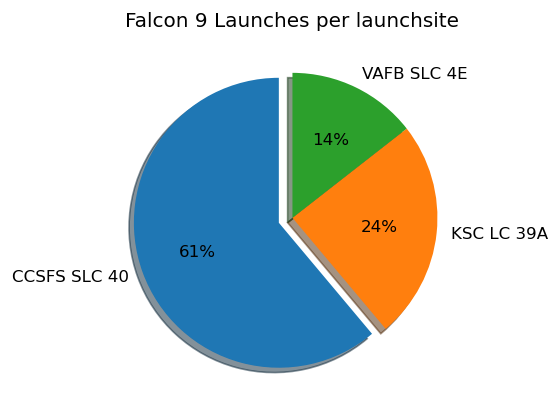

In [6]:
# Print the count of launches per launchsite
print("Number of launches")
print("-"*30)
print(falcon9_data['LaunchSite'].value_counts())

# Create a piechart with the percentage of launches per launchpad
plt.figure(dpi=120)
# Argument to separate first slice (major)
explode = (0.1, 0, 0)
# Autopct='%1.0f%%' (cero decimals), startangle=90 (angle of first slice)
falcon9_data['LaunchSite'].value_counts().plot.pie(y='LaunchSite',autopct='%1.0f%%', shadow=True, explode=explode, startangle=90)
plt.ylabel("")
plt.title("Falcon 9 Launches per launchsite")
plt.savefig('../output/launches_per_launchsite.png', bbox_inches='tight')
plt.show()

In [7]:
launchsite_coordinates = falcon9_data[['LaunchSite','Latitude','Longitude']].groupby('LaunchSite').first()
launchsite_coordinates

,Latitude,Longitude
LaunchSite,,
CCSFS SLC 40,28.561857,-80.577366
KSC LC 39A,28.608058,-80.603956
VAFB SLC 4E,34.632093,-120.610829


As expected, the launch sites are located along the Atlantic and Pacific coasts closest to the equator, where the objects have a greater tangential speed thanks to the fact that it is the point of maximum diameter of the planet earth. Since Cape Canaveral is about 28.5 degrees above the equator, the boost a rocket receives is slightly less than the Earth's rate of spin exactly at the equator. That boost ends up being about 914 mph (1,471 km/h), according to NASA. The SpaceX Crew Dragon spacecraft, launched by a Falcon 9 rocket, is due to reach approximately 17,000 mph (27,000 km/h) when it enters Earth's atmosphere.The exact position of the launchsites is shown below.

In [8]:
# Import folium DivIcon plugin
from folium.features import DivIcon

# Define a list of USA's latitude and longitude
USA_coordinate = [37.09024,-95.712891]
# Create a folium map object centered at USA_coordinate with a zoom level of 4
launch_map = folium.Map(location=USA_coordinate, zoom_start=4)

# Iterate over each row of the launchsite_coordinates dataframe
for index, data in launchsite_coordinates.iterrows():
    # Extract the name of the launch site from the dataframe row
    name = index
    # Extract the latitude and longitude of the launch site from the dataframe row
    coordinates = [data['Latitude'],data['Longitude']]
    
    # Create a folium Circle object with the given coordinates and add it to the launch_map
    circle = folium.Circle(coordinates, 
                           radius=50, 
                           color='#d35400', 
                           fill=True, 
                           popup=name).add_to(launch_map)
    
    # Create a folium marker object with the given coordinates to show the name
    marker = folium.map.Marker(coordinates,
                               icon=DivIcon(icon_size=(20,20),
                                            icon_anchor=(0,0),
                                            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % name,)).add_to(launch_map)

# Display the updated map with launch sites added as circles with popups.
launch_map   

<a name="3.2.3"></a>
### 3.2.3 Launchsite sucess ratio on map

The interactive map allows you to see the number of launches per site and groups the missions where the landing was successful (green) or failed (red).

In [9]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster

# Apply a function to check the value of `success` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red
falcon9_data['ColorMarker'] = falcon9_data['Success'].apply(lambda x: 'red' if x==0 else 'green')

# Create a MarkerCluster Object
marker_cluster = MarkerCluster()

# Add marker_cluster to current site_map
launch_map.add_child(marker_cluster)

# Iterate over each row of the falcon9_data dataframe
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
for index, data in falcon9_data.iterrows():
    # Extract the name of the launch site from the dataframe row
    coordinates = [data['Latitude'],data['Longitude']]
    # Extract the color marker from the dataframe row
    icon_color = data['ColorMarker']
    
    # Create a marker with the color of icon color and the coordinates of the dataframe row
    marker = folium.Marker(location=coordinates,icon=folium.Icon(color='white',icon_color=icon_color))
    # Add previous marker to marker_cluster
    marker_cluster.add_child(marker)

launch_map.save('../output/map_launchsites.html')
launch_map

<a name="3.2.4"></a>
### 3.2.4 Success through the years
Landing success on spaceX missions has been increasing at an almost constant rate since 2013.

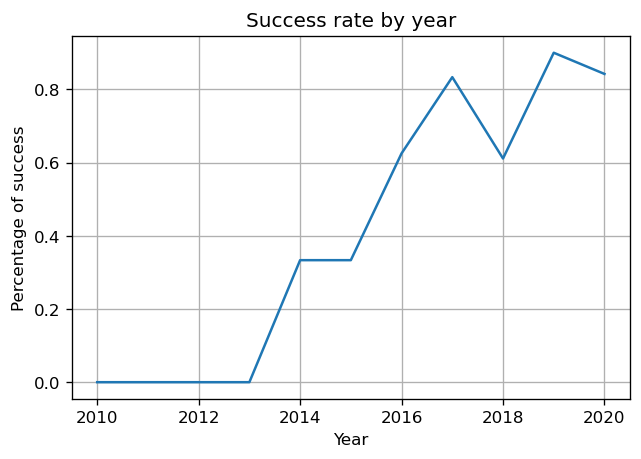

In [10]:
# Convert 'Date' column to datetime and extract the year into a new column
falcon9_data['Date'] = pd.to_datetime(falcon9_data['Date'])
falcon9_data['Year'] = pd.DatetimeIndex(falcon9_data['Date']).year

# Group the data by year and calculate the average success rate
falcon9_yearly_mean = falcon9_data.groupby('Year').mean()['Success']

# Create the line graph
plt.figure(dpi=120)
sns.lineplot(x=falcon9_yearly_mean.index,y=falcon9_yearly_mean)
plt.ylabel("Percentage of success")
plt.title("Success rate by year")
plt.grid()
plt.savefig('../output/success_rate_by_year.png', bbox_inches='tight')
plt.show()

<a name="3.2.5"></a>
### 3.2.5 Payload Mass
Most launch attempts were of low payload mass, where half failed. on the other hand, most of the high-payload mass launches were successful. This phenomenon is not directly linked to the launch date, so it provides valuable information.

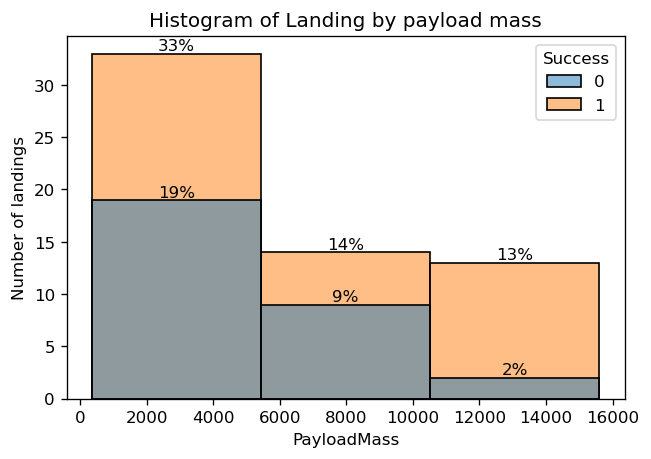

In [11]:
plt.figure(dpi=120)
# create a histogram with the 'PayloadMass' column of the 'falcon9_data' dataframe on the x-axis, 
# separated by the 'Success' column (i.e., success and failure), with multiple bars per bin ('layer') 
# and with three bins (low, medium and high payload)
ax = sns.histplot(data=falcon9_data,x='PayloadMass',hue='Success', multiple='layer' ,bins=3)

# extract the heights of each bar and
# create a label for each bar with the corresponding height (formatted as a percentage)
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h :.0f}%' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='edge')
    
ax.set_ylabel('Number of landings')
plt.title("Histogram of Landing by payload mass")
plt.savefig('../output/hist_landig_payload.png', bbox_inches='tight')
plt.show()

In [12]:
# divide PayloadMass in 3 parts (low, medium and high payload)
low_payload = falcon9_data['PayloadMass'].max() / 3
mid_payload = low_payload * 2

# Find the maximun date of a low payload faiulure
max_date_lowp = falcon9_data[(falcon9_data['PayloadMass'] < low_payload) & (falcon9_data['Success'] == 0)]['Date'].max()
print(f"The last unsuccessful low payload flight was in: {max_date_lowp}")

# Find the maximun date of a midium payload faiulure
max_date_midp = falcon9_data[(falcon9_data['PayloadMass'] < mid_payload) & (falcon9_data['Success'] == 0)]['Date'].max()
print(f"The last unsuccessful midium payload flight was in: {max_date_midp}")

The last unsuccessful low payload flight was in: 2018-12-23 00:00:00
The last unsuccessful midium payload flight was in: 2020-01-19 00:00:00


<a name="3.2.6"></a>
### 3.2.6 Orbits sucess
Some orbits have a higher successuf rate than others. Special attention to the orbit of the international space station (**ISS**), which was one of the main reasons why NASA awarded contracts to SpaceX.

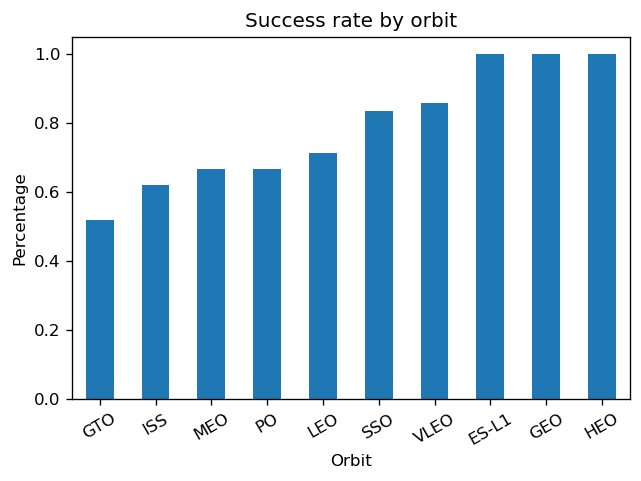

In [13]:
# quite understandable code
plt.figure(dpi=120)
falcon9_data.groupby("Orbit").mean()["Success"].sort_values().plot.bar()
plt.ylabel("Percentage")
plt.title("Success rate by orbit")
plt.xticks(rotation=30)
plt.savefig('../output/success_orbit.png', bbox_inches='tight')
plt.show()

<a name="3.2.7"></a>
### 3.2.7 Launch sites sucess
Similarly, one of the platforms has a different success rate (**CCFS SLC 40** located in cabo canaveral, responsible for 61% of all launches and with a slight payload less than the rest). It is an event at first impression does not seem to be random.

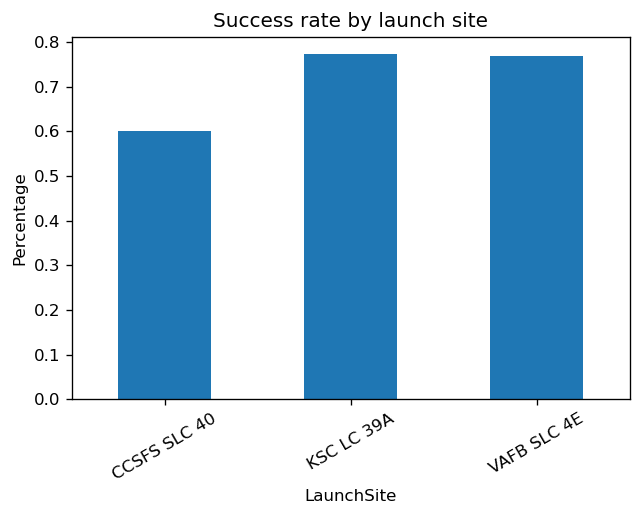

In [25]:
# Graph the success rate per launchsite
plt.figure(dpi=120)
falcon9_data.groupby("LaunchSite").mean()["Success"].plot.bar()
plt.ylabel("Percentage")
plt.title("Success rate by launch site")
plt.xticks(rotation=30)
plt.savefig('../output/success_launchsite.png', bbox_inches='tight')
plt.show()

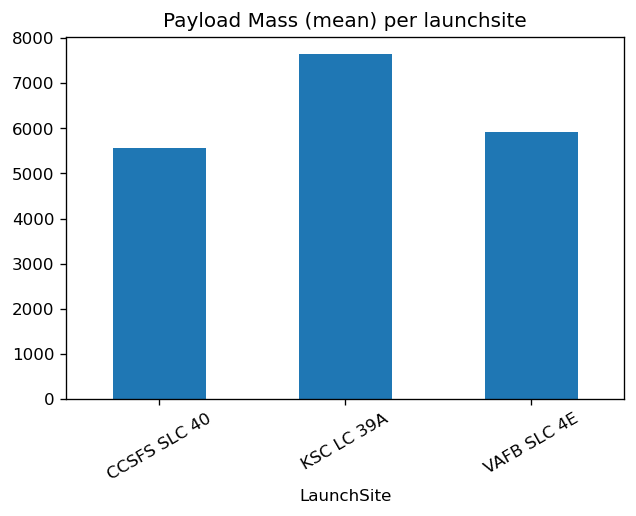

In [26]:
# Graph the mean of payload per launchsite
plt.figure(dpi=120)
falcon9_data.groupby('LaunchSite').mean()['PayloadMass'].plot.bar()
plt.xticks(rotation=30)
plt.title('Payload Mass (mean) per launchsite')
plt.savefig('../output/mean_payload_launchsite.png', bbox_inches='tight')
plt.show()

<a name="3.2.8"></a>
### 3.2.8 Number of flights (reused)
59% of the flights were single use and with a success rate of 60%, 21% and 9% correspond to flights with two and three attemps with a success rate of 79% and 88% respectively. From this point on, the success rate drops linearly at 4 and 5 uses (the latter being the most problematic). However, all 6-use flights were successful. This information is highly relevant and interesting. Statistically it can be affirmed that by successfully completing first launch, the probability of failure on the second and third attempts is considerably reduced. as for the fourth, fifth and sixth attempts, the amount of information available is not sufficient for a statistically significant statement (examples are very few).

Number of launches
------------------------------
1    53
2    19
3     8
4     6
5     2
6     2
Name: Flights, dtype: int64


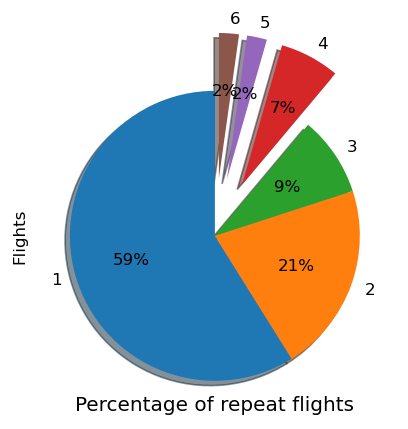

In [36]:
# Print the count of launches per flights (rehuse rockets)
print("Number of launches")
print("-"*30)
print(falcon9_data['Flights'].value_counts())

# Create a piechart with the percentage of launches per flights
plt.figure(dpi=120)
# Argument to separate 3 last slices (minors)
explode = (0, 0, 0, 0.4, 0.4, 0.4)
falcon9_data['Flights'].value_counts().plot.pie(y='Flights',autopct='%1.0f%%', shadow=True, explode=explode, startangle=90)
# Put the title bellow figure
plt.title("Percentage of repeat flights", y=-0.01)
plt.savefig('../output/repeat_flights.png', bbox_inches='tight')
plt.show()

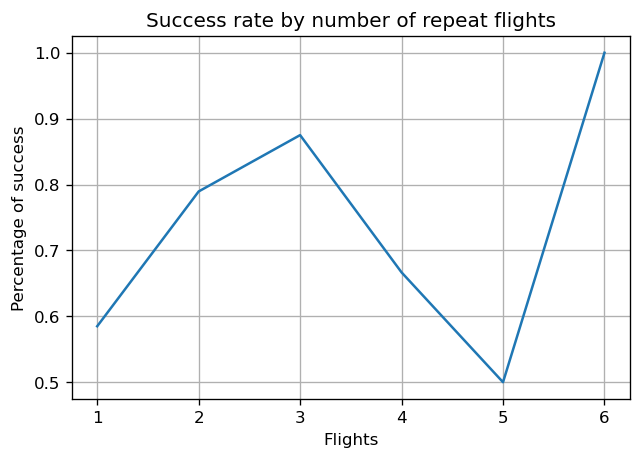

In [58]:
# Extract the mean of the flights (rehused rockets)
falcon9_flights_mean = falcon9_data.groupby('Flights').mean()['Success']

# Create the line graph
plt.figure(dpi=120)
sns.lineplot(x=falcon9_flights_mean.index,y=falcon9_flights_mean)
plt.ylabel("Percentage of success")
plt.title("Success rate by number of repeat flights")
plt.grid()
plt.savefig('../output/success_rate_repeat_flights.png', bbox_inches='tight')
plt.show()

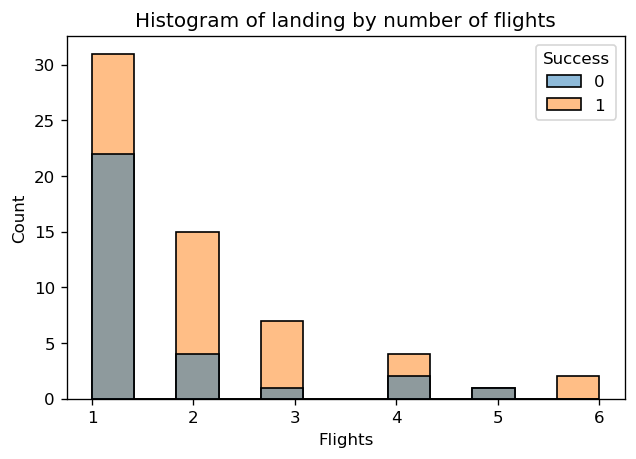

In [60]:
# This is an alternative to compactly show the two previous graphs
# However, it can be a little more complicated to understand at first glance.
plt.figure(dpi=120)
sns.histplot(data=falcon9_data,x='Flights',hue='Success')
plt.title("Histogram of landing by number of flights")
plt.savefig('../output/hist_landig_number_flights.png', bbox_inches='tight')
plt.show()

<a name="3.2.9"></a>
### 3.2.9 Added parts

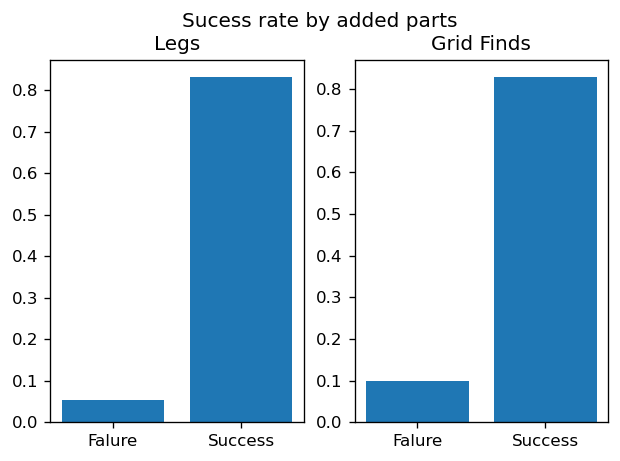

In [61]:
# create a figure with two subplots with 120 dots per inch (dpi)
fig, (ax1, ax2) = plt.subplots(1,2,dpi=120)
fig.suptitle('Sucess rate by added parts')

# define the names for the two categories
names = ['Falure', 'Success']

# extract the success rates for each value of the 'Legs' and 'gridfinds' attributes from the 'falcon9_data' dataframe 
values_legs = falcon9_data.groupby('Legs').mean()['Success'].values
values_gridfinds = falcon9_data.groupby('GridFins').mean()['Success'].values

# create a bar plot for the 'Legs' and 'gridfinds'
ax1.bar(names, values_legs)
ax1.set_title('Legs')
ax2.bar(names, values_gridfinds)
ax2.set_title('Grid Finds')
plt.savefig('../output/success_added_parts.png', bbox_inches='tight')
plt.show()

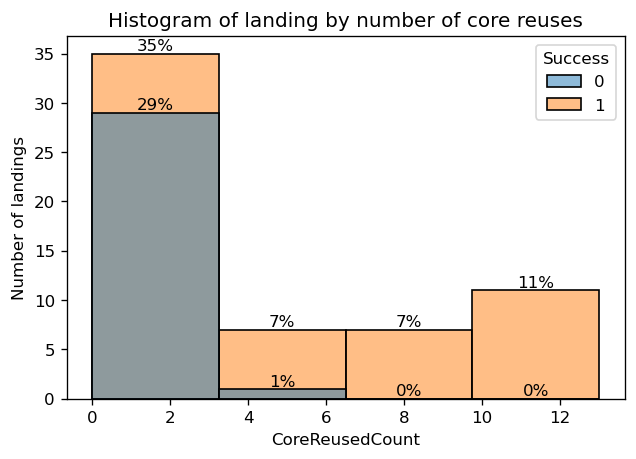

In [68]:
plt.figure(dpi=120)
# create a histogram with the 'CoreReusedCount' column of the 'falcon9_data' dataframe on the x-axis, 
# separated by the 'Success' column (i.e., success and failure), with multiple bars per bin ('layer') 
# and with four bins
ax = sns.histplot(data=falcon9_data,x='CoreReusedCount',hue='Success',bins=4)

# extract the heights of each bar and
# create a label for each bar with the corresponding height (formatted as a percentage)
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h :.0f}%' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='edge')

plt.title("Histogram of landing by number of core reuses")
ax.set_ylabel('Number of landings')
plt.savefig('../output/success_core_reuses.png', bbox_inches='tight')
plt.show()

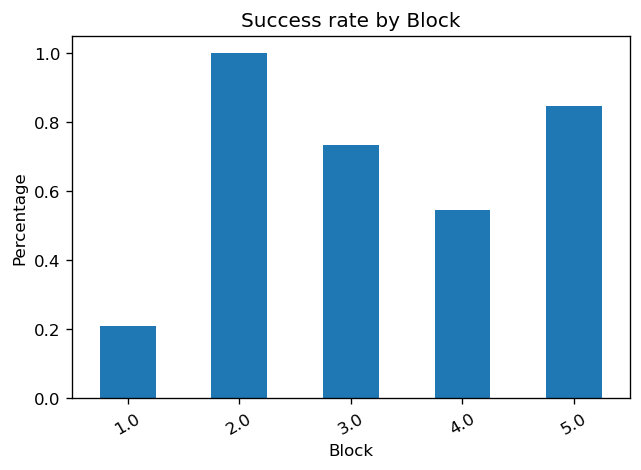

In [69]:
plt.figure(dpi=120)
# Group by block to calculate the success percentage
falcon9_data.groupby('Block').mean()['Success'].plot.bar()
plt.title("Success rate by Block")
plt.ylabel("Percentage")
plt.xticks(rotation=30)
plt.savefig('../output/success_block.png', bbox_inches='tight')
plt.show()